In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/HepatitisCdata.csv')

Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,4,59,0,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10
GGT,615.0,39.533171,54.661071,4.50,15.700,23.30,40.200,650.90


In [ ]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()

label_enco = LabelEncoder() 
df[final_categorical_feature] = df[final_categorical_feature].apply(lambda col: label_enco.fit_transform(col)) 
df.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


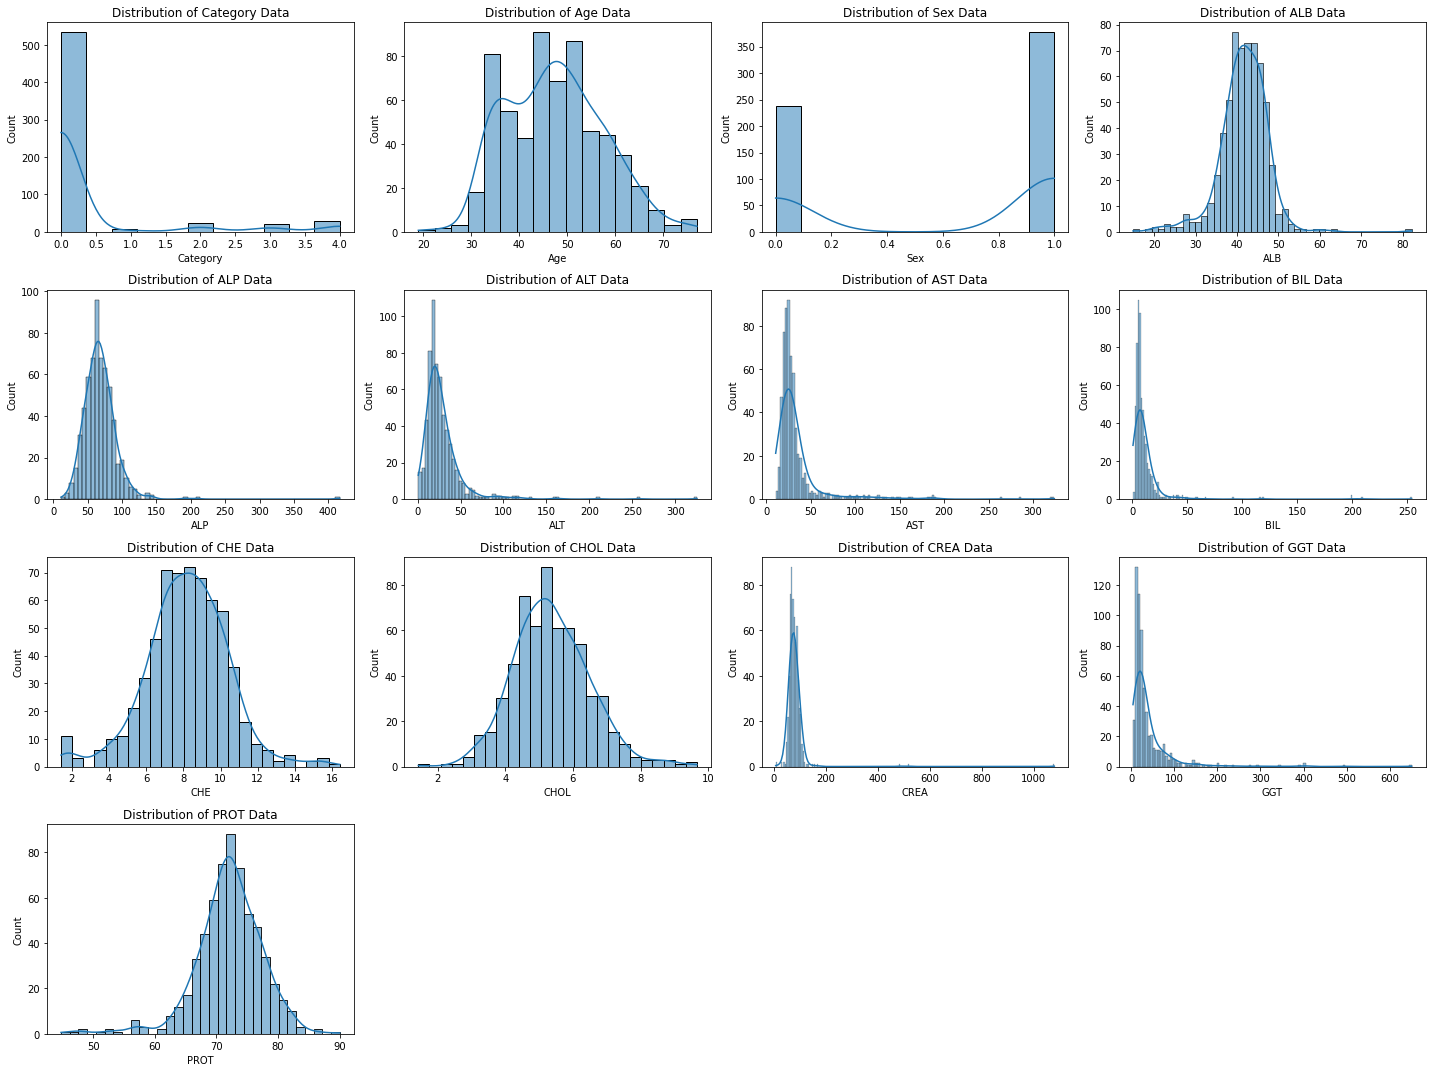

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
df.Category.value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

In [ ]:
from sklearn.utils import resample
df_majority = df[df.Category==0]
df_minority1 = df[df.Category==1]
df_minority2 = df[df.Category==2]
df_minority3 = df[df.Category==3]
df_minority4 = df[df.Category==4]
 
# Upsample minority class
df_minority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=180,    # to match majority class
                                 random_state=123)
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=50,    # to match majority class
                                 random_state=123)
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=100,    # to match majority class
                                 random_state=123)
df_minority_upsampled3 = resample(df_minority3, 
                                 replace=True,     # sample with replacement
                                 n_samples=120,    # to match majority class
                                 random_state=123)
df_minority_upsampled4 = resample(df_minority4, 
                                 replace=True,     # sample with replacement
                                 n_samples=150,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_minority_downsampled, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3,df_minority_upsampled4])

In [ ]:
df_upsampled.Category.value_counts()

0    180
4    150
3    120
2    100
1     50
Name: Category, dtype: int64

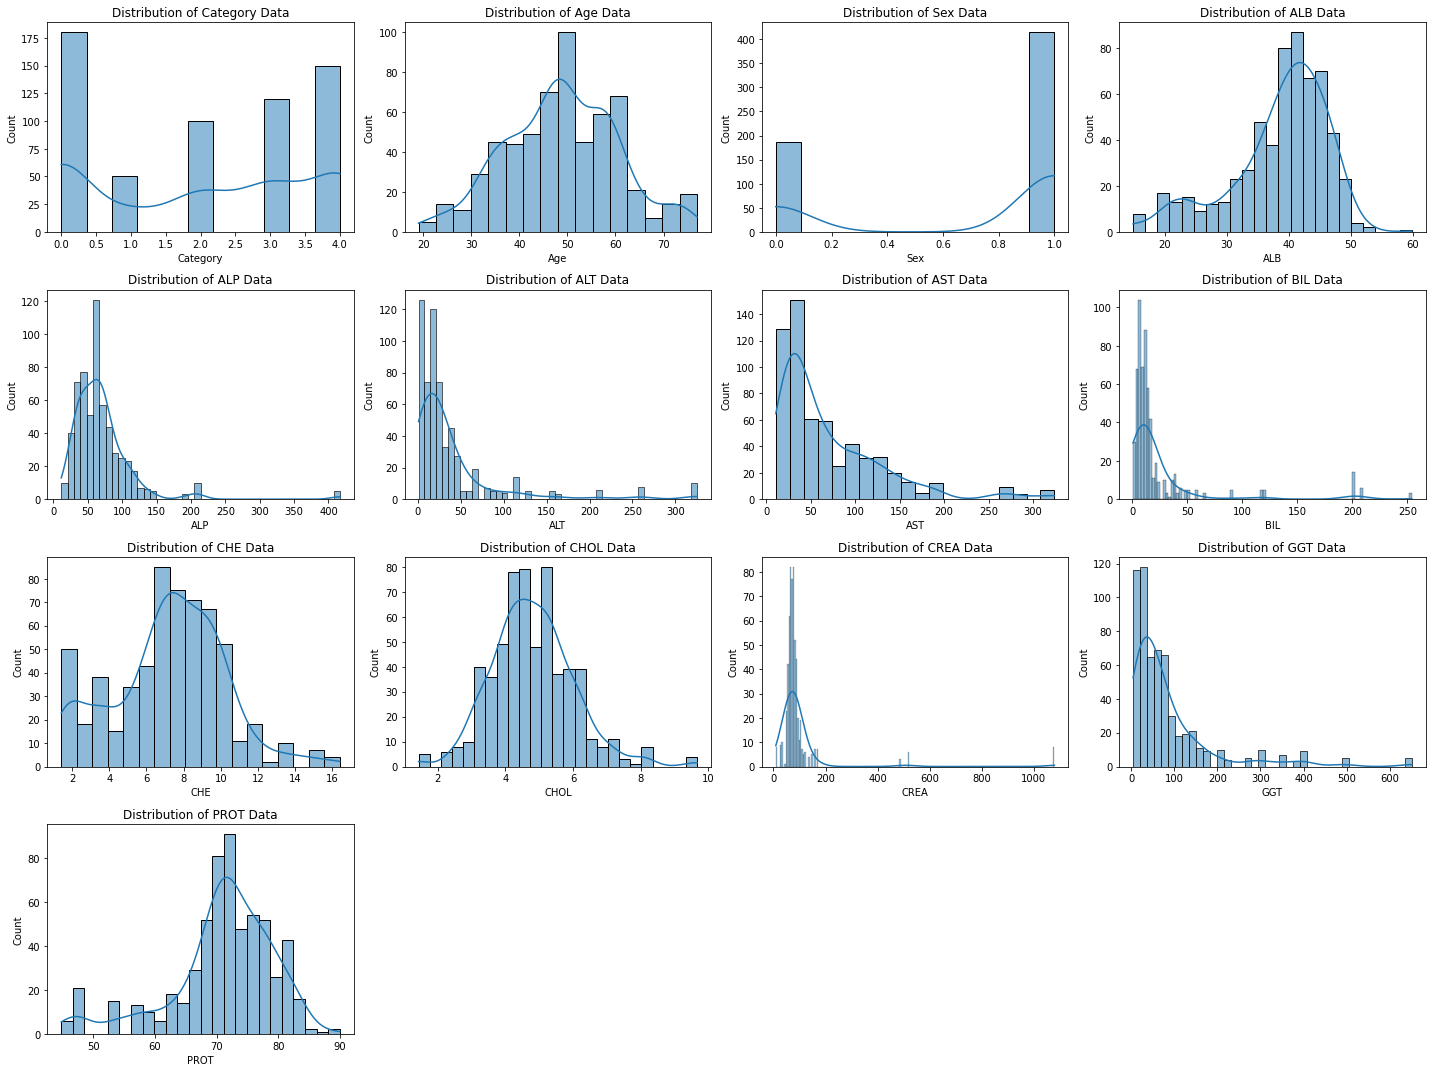

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df_upsampled.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_upsampled[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
col = df_upsampled.columns.tolist()
col.pop(0)

df_upsampled[col] = scale.fit_transform(df_upsampled[col])

In [ ]:
df_upsampled.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
593,4,0.551724,1.0,0.536748,0.134962,0.088471,0.556477,0.071880,0.038692,0.263350,0.046070,0.611077,0.765487
598,4,0.672414,1.0,0.358575,0.325191,0.018804,0.546267,0.225908,0.124750,0.302184,0.053640,0.416460,0.736726
607,4,0.568966,0.0,0.536748,0.063410,0.001233,0.063178,0.079779,0.327552,0.285194,0.139426,0.213490,0.838496
599,4,0.689655,1.0,0.469933,0.094745,0.013255,0.317486,0.142970,0.058039,0.273058,0.102047,0.081064,0.663717
600,4,0.689655,1.0,0.269488,0.154207,0.009556,0.174218,0.822275,0.070047,0.264563,0.058593,0.037129,0.349558


In [ ]:
x = df_upsampled.drop("Category", axis = 1)
y = df_upsampled['Category']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.25)
print(y_train.value_counts())

0    135
4    113
3     90
2     75
1     37
Name: Category, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(x_train, y_train)

y_test_pred_DT = DT.predict(x_test)
y_train_pred_DT = DT.predict(x_train)

test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)
scores_DT = cross_val_score(DT, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_DT = precision_score(y_test, y_test_pred_DT,average='micro')
recall_score_DT = recall_score(y_test, y_test_pred_DT,average='micro')
f1_score_DT = f1_score(y_test, y_test_pred_DT,average='micro')
conf_DT = confusion_matrix(y_test, y_test_pred_DT)


print("Tain set Accuracy: ", train_acc_DT)
print("Test set Accuracy: ", test_acc_DT)
print("cv:  %s\n"% scores_DT.mean())
print("************************************************")
print("precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_DT))

Tain set Accuracy:  0.9022222222222223
Test set Accuracy:  0.8
cv:  0.8600000000000001

************************************************
precision_score:  0.8
recall_score:  0.8
f1_score:  0.8000000000000002
************************************************

Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.62      1.00      0.76        13
           2       0.80      0.64      0.71        25
           3       0.62      0.80      0.70        30
           4       0.97      0.76      0.85        37

    accuracy                           0.80       150
   macro avg       0.79      0.81      0.79       150
weighted avg       0.83      0.80      0.81       150


